In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import ExponentialFitter
plt.style.use('bmh')

# Estimating Survival Distribution

In [5]:
veteran_df = pd.read_csv('./data/veteran.csv')

In [6]:
veteran_df.head()

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
0,1,1,squamous,72,1,60,7,69,0
1,2,1,squamous,411,1,70,5,64,10
2,3,1,squamous,228,1,60,3,38,0
3,4,1,squamous,126,1,60,9,63,10
4,5,1,squamous,118,1,70,11,65,10


- `status`: censoring status (survive: 1 or not: 0)
- `trt`: treatment group 1 & 2
- `time`

In [9]:
veteran_df_1= veteran_df[veteran_df["trt"] == 1] # Group 1

In [10]:
epf = ExponentialFitter().fit(veteran_df_1['time'], veteran_df_1['status'])

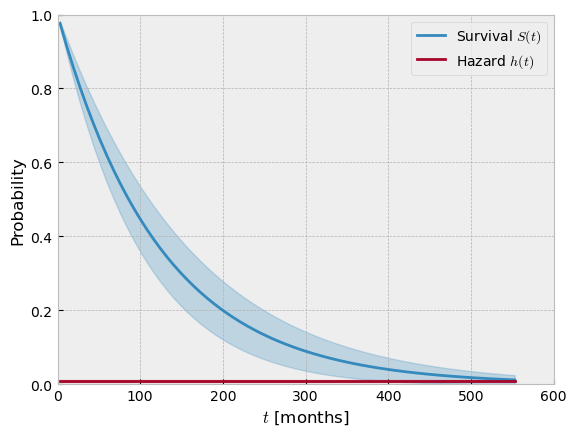

In [23]:
epf.plot_survival_function(label=r'Survival $S(t)$').legend();
epf.plot_hazard(label=r'Hazard $h(t)$').legend();
plt.xlabel(r'$t$ [months]');
plt.ylabel(r'Probability');
plt.xlim([0, 600]);
plt.ylim([0, 1]);

# Predicting Survival Probability

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
train, test = train_test_split(veteran_df_1) # 75% train + 25% test

In [27]:
trained_epf = ExponentialFitter().fit(train['time'], train['status'])

In [28]:
estimated_sp = trained_epf.predict(test['time'])

In [29]:
estimated_sp

18     0.865909
18     0.865909
42     0.714664
18     0.865909
18     0.865909
100    0.449390
110    0.414845
56     0.638953
260    0.124974
151    0.298856
4      0.968512
287    0.100700
162    0.273684
177    0.242741
384    0.046353
35     0.755820
8      0.938015
63     0.604161
182    0.233225
12     0.908479
Name: Exponential_estimate, dtype: float64

# Computing Accuracy

In [30]:
import math

In [32]:
def brier_score(actual, estimated):
    n = len(actual)
    error = 0
    for i in range(n):
        error += math.pow(estimated.iloc[i]-actual.iloc[i], 2)
    return error/n

In [35]:
round(brier_score(test['status'], 1 - estimated_sp), 3) # lumayan tapi bs diimprove pake model yg lebih bagus

0.357